<span style="font-family:Times; font-size:2.5em; ">
        <div class="alert alert-success">
            <span style="color:blue">
               <center>Srijesh Redddy Homework Week 4<br><br> ==>  
                   Linear Regression with TensorFlow <== </center>
            </span>
         </div>
    </span>

### Conda environment Information

In [1]:
# This records when you started running this Notebook
import time
start = time.time()

In [2]:
!conda info


     active environment : base
    active env location : /Users/srijesh/opt/anaconda3
            shell level : 1
       user config file : /Users/srijesh/.condarc
 populated config files : /Users/srijesh/.condarc
          conda version : 22.9.0
    conda-build version : 3.22.0
         python version : 3.9.13.final.0
       virtual packages : __osx=10.14.6=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /Users/srijesh/opt/anaconda3  (writable)
      conda av data dir : /Users/srijesh/opt/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /Users/srijesh/opt/anaconda3/pkgs
                          /Users/srijesh/.conda/pkgs
       

In [3]:
%reload_ext version_information

%version_information numpy, matplotlib, keras, scikit-learn, tensorflow, sklearn, not-installed, watermark

ModuleNotFoundError: No module named 'version_information'

### Student Information

<span style="font-size:1.3em;">
   
<div class="alert alert-danger" role="alert">
    <center>
    
 <div class="alert alert-danger" role="alert">   <span style="font-size:0.8em;">
     Note: <b>add your name</b> in the following cell!<br></center>
</div>


In [3]:
# Edit to add your name.  Also, change the filename to include your name.

My_Name = "Srijesh Reddy Yarram"
print(My_Name)

Srijesh Reddy Yarram


In [4]:
import datetime as dt  
dt.datetime.today().strftime("%m/%d/%Y %H:%M:%S %p")

'11/20/2022 22:56:10 PM'

In [5]:
import sys
print(sys.executable)
print()
print(sys.version)
print()
print(sys.version_info)
print()
print(sys.platform)

/Users/srijesh/opt/anaconda3/envs/tf2/bin/python

3.9.13 (main, Oct 13 2022, 16:12:30) 
[Clang 12.0.0 ]

sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)

darwin


In [6]:
import platform
platform.platform()

'macOS-10.14.6-x86_64-i386-64bit'

In [7]:
!conda info --envs

# conda environments:
#
base                  *  /Users/srijesh/opt/anaconda3
tf2                      /Users/srijesh/opt/anaconda3/envs/tf2



---

# Linear Regression 

In [8]:
%matplotlib inline
# Allows matplotlib to plot in Jupyter

In [9]:
# Some needed utilities
from IPython.display import display, clear_output
import time

In [10]:
# Prevent some warning messages from displaying
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning)

In [11]:
# Load TensorFlow and surpress some non-error messages
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [12]:
#import tensorflow as tf but use the Version 1 syntax in this Notebook
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.get_logger().setLevel('ERROR')

In [13]:
# What version of TF?
tf.__version__

'2.9.1'

### Lets create a dataset which is roughly linear.  Note the values for a and b

> <font color=blue><b>random.normal()</b></font> adds some 'fuzz' so the points spread out

In [14]:
import numpy as np

np.random.seed(10)

number_of_points = 200
x_point = []
y_point = []
a = 0.22
b = 0.78
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b +np.random.normal(0.0,0.1)   #  Note: a=slope b=intercept then add some random noise
    x_point.append([x])
    y_point.append([y])


#### What does the data look like?

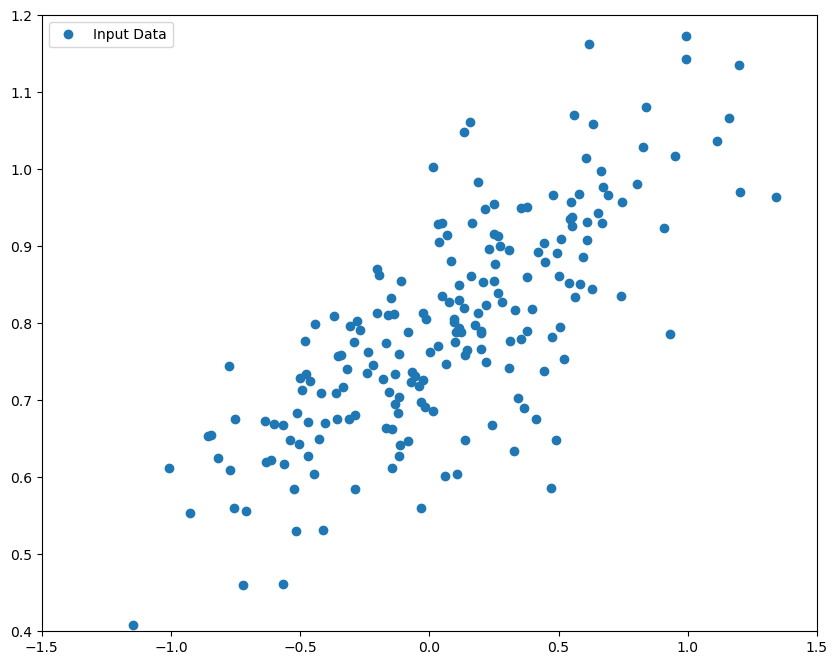

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.axis([-1.5,1.5, 0.4, 1.2])
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc='upper left')
plt.show()

### Now create a TensorFlow model to estimate a linear regression solution 

In [16]:
A = tf.Variable(tf.random_uniform([1], -1.5, 1.5))
B = tf.Variable(tf.zeros([1]))
y = A * x_point + B

cost_function = tf.reduce_mean(tf.square(y - y_point))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(cost_function)

model = tf.initialize_all_variables()

### Watch close, the animation runs fast!
##### You can change the time.sleep() to speed up or slow down the animation

> NOTE: Observe the computed values of A abd found by TensorFlow!

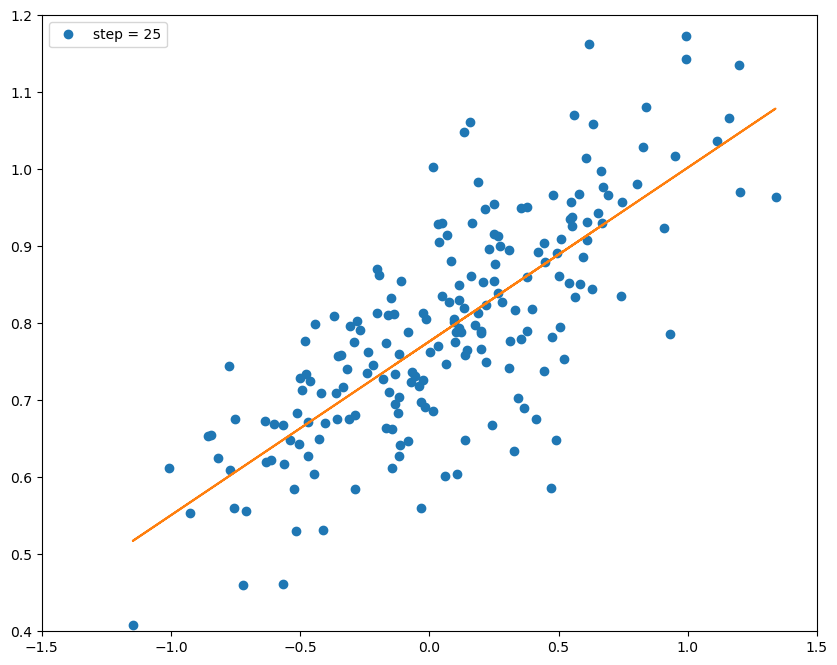

Computed A is:  [0.22564104]
Computed B is:  [0.7764201]


In [17]:
with tf.Session() as session:
        session.run(model)
        for step in range(0,26):
                session.run(train)
                if (step % 1) == 0:
                    plt.figure(figsize=(10,8))
                    plt.axis([-1.5,1.5, 0.4, 1.2])
                    plt.plot(x_point, y_point,'o', label='step = {}'.format(step))
                    plt.plot(x_point, session.run(A) * x_point + session.run(B))
                    plt.legend(loc='upper left')
                    clear_output(wait=True)   # "cheap animation!" - each plot shows prgress of the session
                    plt.show()                # repeated plotting looks like an animation!
                    time.sleep(0.5)
        print("Computed A is: ",session.run(A))
        print("Computed B is: ",session.run(B))

#### Try running above cell a few times to see how TensorFlow learns (estimates) the regression line

In [18]:
#Lets see the running time:

end = time.time()
print("Run time in seconds:",end - start)
print("Run time in minutes:",(end - start)/60.0)

Run time in seconds: 337.9855308532715
Run time in minutes: 5.633092180887858


---
---

<span style="font-family:Times; font-size:2.5em; ">
 <div class="alert alert-warning">
    <center> Homework Questions (25 Points)</center>
 </div>
</span>


### Type your answers to these questions in the blank Markdown cells below (click the 'Ans:' cell to edit it)
#### [5 points] Why in each run does the line start form a differnt location?

Ans:As we are using the gradient descent technique in finding the best fit model which according to the technique is local minimum of the function taken which here is y=Ax+B where A is slope and B is the intercept. Initially we are giving a random value for a between -1.5 to 1.5 and we are assigning zero for B and from there we are plotting the initial y and then by using the cost function we are generating parameters that has different values of A and B and by setting the speed as 0.5 we are training the data. so the train = opt.apply_gradients(grads) updates the variables given gradients. so when we are using this train in the for loop it takes the data of A and B from the trained dataset and pushes it to the plt.plot(x_point, session.run(A) * x_point + session.run(B))creating a line which starts from different location everytime we run it, as the data regarding the gradients is going to differ everytime it iterates and hence when we use the plt.show() the line starts from different location untill it finds the best fit line.

#### [5 points] What exact values should A and B be? Is TensorFlow close? In each run, does it seem the initial line location makes a difference on how close the results computed are to the exact values A and B should be?

Ans: The exact values that A and Bn should be are A = 0.78, B = 0.21, the tensorflow has provided values A=0.786 and B =0.206, considering this i can say that the tensorflow values are very close to what the exact values should be. The line started moving from top to down of the y axis and stopped at a point i think the gradients were making a shift, rearranging the derivative of loss with respect to the weights over training data. so i think that the initial location of the line makes a difference on how close the results computed are to the exact values of A and B should be.

---

### [15 points] Copy (some) of the above cells and paste below to: 
* Create a new dataset with different slope (a) and intercept (b) from the example above
* Plot your new dataset  
* Plot/animate to see how close TensorFlow learns (estimates) the regression line slope (A) and intercept (B). <br><br>
\[HINT: Copy code cells from above example. Use all the same variable names; Just change some of the numeric values. You should NOT need to write much (any?) new code\]

In [23]:
import numpy as np

np.random.seed(10)

number_of_points = 200
x_point = []
y_point = []
a = 0.78
b = 0.21
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b +np.random.normal(0.0,0.1)   
    x_point.append([x])
    y_point.append([y])

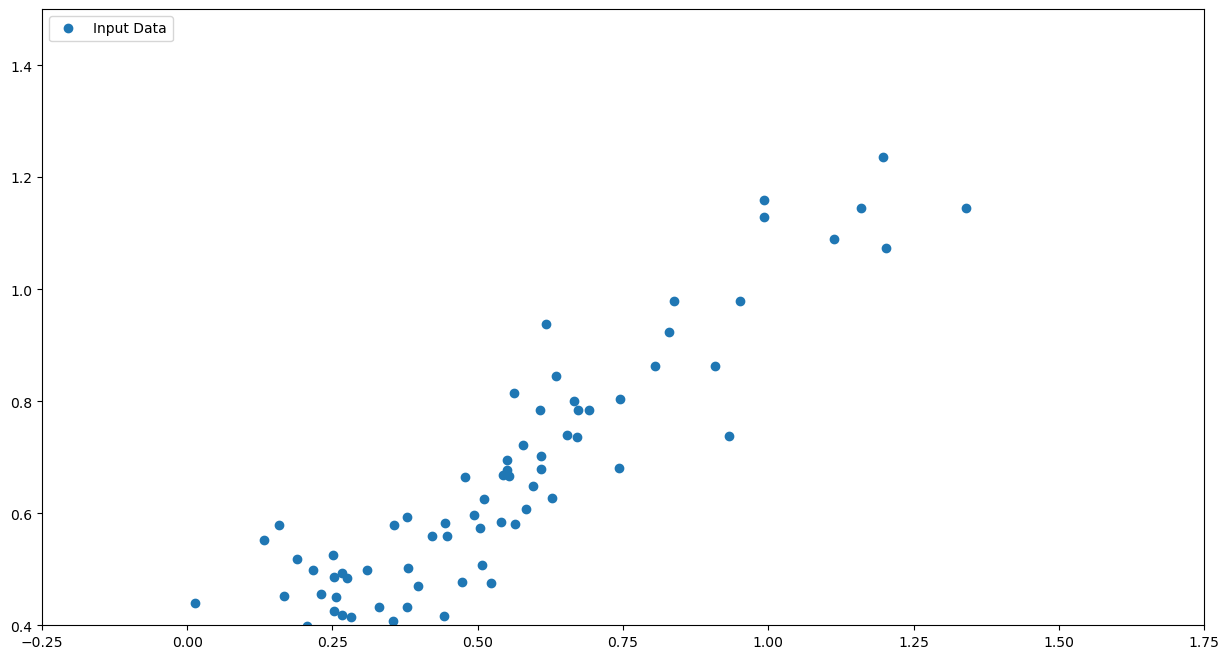

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.axis([-0.25,1.75,0.4, 1.5])
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc='upper left')
plt.show()

In [39]:
A = tf.Variable(tf.random_uniform([1], -1.5, 1.5))
B = tf.Variable(tf.zeros([1]))
y = A * x_point + B

cost_function = tf.reduce_mean(tf.square(y - y_point))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(cost_function)

model = tf.initialize_all_variables()

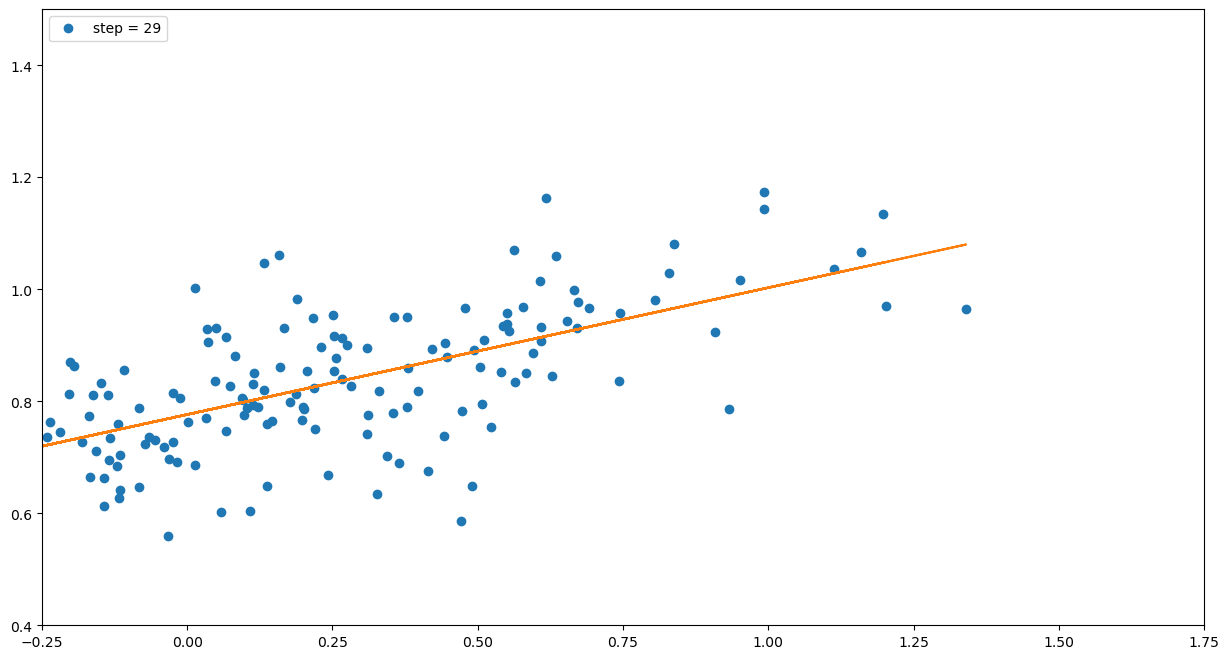

Computed A is:  [0.22655383]
Computed B is:  [0.7763405]


In [19]:
with tf.Session() as session:
        session.run(model)
        for step in range(0,30):
                session.run(train)
                if (step % 1) == 0:
                    plt.figure(figsize=(15,8))
                    plt.axis([-0.25,1.75,0.4, 1.5])
                    plt.plot(x_point, y_point,'o', label='step = {}'.format(step))
                    plt.plot(x_point, session.run(A) * x_point + session.run(B))
                    plt.legend(loc='upper left')
                    clear_output(wait=True)   # "cheap animation!" - each plot shows prgress of the session
                    plt.show()                # repeated plotting looks like an animation!
                    time.sleep(0.1)
        print("Computed A is: ",session.run(A))
        print("Computed B is: ",session.run(B))

In [44]:
end = time.time()
print("Run time in seconds:",end - start)
print("Run time in minutes:",(end - start)/60.0)

Run time in seconds: 1159.5720686912537
Run time in minutes: 19.326201144854227


<br>
<div class="alert alert-warning">
    <center> The end. </center>
</div>